# Initiation au Format DICOM (Digital Imaging and Communications in Medicine)

## Overview

Le format DICOM (Digital Imaging and Communications in Medicine) est devenu un standard incontournable dans le domaine de l’imagerie médicale. Il permet l’intégration, la communication et l’échange d’images médicales entre différents équipements et logiciels au sein des établissements de santé. Ce TP a pour but de nous initier aux spécificités de ce format, tant au niveau de sa structure que de sa manipulation via des outils informatiques adaptés.



## Objectif


L’objectif principal de ce TP est de se familiariser avec le format DICOM à travers plusieurs étapes :
Comprendre la structure et les composants d’un fichier DICOM.
Manipuler les métadonnées et les images contenues dans ces fichiers à l’aide de bibliothèques Python comme pydicom.
Explorer les données binaires et les balises en hexadécimal.
Appliquer des techniques de compression et d’anonymisation.
Générer un rapport automatisé incluant les résultats des traitements effectués.


### Libraries

In [10]:
import pydicom 
import json 
import matplotlib.pyplot as plt
import numpy as np
from fpdf import FPDF
import os

## Chargement et affichage des métadonnées

Cette partie permet de charger et d'afficher les métadonnées d'un fichier DICOM. Le format DICOM (Digital Imaging and Communications in Medicine) est largement utilisé pour stocker et transmettre des images médicales, telles que celles obtenues par radiographie, scanner (CT), ou IRM. Ces fichiers contiennent non seulement des données d'image, mais aussi des informations essentielles sur le patient et l'examen effectué. Voici un aperçu détaillé du processus.

In [5]:
def afficher_structure_dicom(fichier):
        dicom_data = pydicom.dcmread(fichier)
        
        print("=== Structure complète du fichier DICOM ===")
        for elem in dicom_data:
            print(f"Tag : {elem.tag}, Nom : {elem.name}, Valeur : {elem.value}")
fichier_dicom = '/Users/aisssamhamida/Desktop/DICOMDIR'  
afficher_structure_dicom(fichier_dicom)

=== Structure complète du fichier DICOM ===
Tag : (0004,1130), Nom : File-set ID, Valeur : 
Tag : (0004,1200), Nom : Offset of the First Directory Record of the Root Directory Entity, Valeur : 394
Tag : (0004,1202), Nom : Offset of the Last Directory Record of the Root Directory Entity, Valeur : 178346
Tag : (0004,1212), Nom : File-set Consistency Flag, Valeur : 0
Tag : (0004,1220), Nom : Directory Record Sequence, Valeur : [(0004,1400) Offset of the Next Directory Record UL: 0
(0004,1410) Record In-use Flag                  US: 65535
(0004,1420) Offset of Referenced Lower-Level Di UL: 490
(0004,1430) Directory Record Type               CS: 'PATIENT'
(0010,0010) Patient's Name                      PN: 'NAME^NONE'
(0010,0020) Patient ID                          LO: 'NOID'(0004,1400) Offset of the Next Directory Record UL: 0
(0004,1410) Record In-use Flag                  US: 65535
(0004,1420) Offset of Referenced Lower-Level Di UL: 690
(0004,1430) Directory Record Type               CS:



## Visualisation de l'image DICOM

Dans cette partie du code, l'objectif est de charger l'image DICOM, de l'afficher à l'aide de Matplotlib, d'ajuster le contraste avec les paramètres vmin et vmax, puis de sauvegarder l'image au format PNG. Ce processus est couramment utilisé pour visualiser des images médicales à partir de fichiers DICOM et les exporter dans un format standardisé.

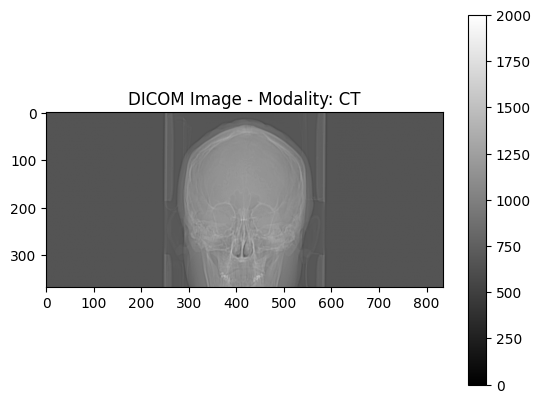

In [6]:
def display_dicom_image(dcm_path):
    ds = pydicom.dcmread(dcm_path)
    plt.imshow(ds.pixel_array, cmap="gray", vmin=0, vmax=2000)
    plt.title(f"DICOM Image - Modality: {ds.Modality}")
    plt.colorbar()
    plt.savefig("dicom_image.png")
    plt.show()

# Exemple d'utilisation
dicom_file = '/Users/aisssamhamida/Downloads/2_skull_ct/DICOM/I0'
display_dicom_image(dicom_file)

# Normalisation et amélioration du contraste:
Dans cette étape, nous allons normaliser les valeurs des pixels de l'image DICOM entre 0 et 255, et appliquer un seuillage (thresholding) pour améliorer le contraste de l'image. Cela permet de rendre les détails de l'image plus visibles, ce qui est particulièrement utile pour les images médicales comme les scans CT.


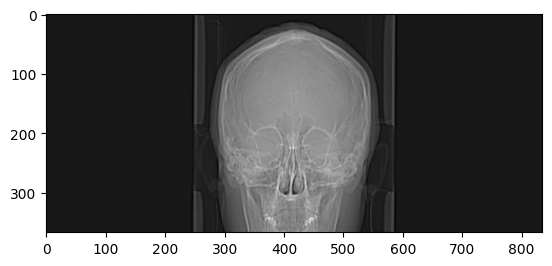

In [7]:
def normalize_image(dcm_path):
    ds = pydicom.dcmread(dcm_path)
    pixel_data = ds.pixel_array.astype(float)
    pixel_data = (np.maximum(pixel_data, 0) / pixel_data.max()) * 255.0
    pixel_data = np.uint8(pixel_data)
    plt.imshow(pixel_data, cmap="gray")
    plt.show()
# Exemple d'utilisation
dicom_file = '/Users/aisssamhamida/Downloads/2_skull_ct/DICOM/I0'
normalize_image(dicom_file)

## Extraction et modification des métadonnées DICOM

Dans cette étape, nous allons extraire et modifier les métadonnées d'un fichier DICOM, telles que le nom du patient (PatientName). Ensuite, nous enregistrerons le fichier DICOM modifié avec les nouvelles métadonnées.

Let's check a few examples:

In [8]:
def modify_metadata(dcm_path, output_path):
    ds = pydicom.dcmread(dcm_path)
    ds.PatientName = "Anonymous"
    ds.save_as(output_path)
    print("Modified DICOM saved!")

# Exemple d'utilisation
dicom_file = '/Users/aisssamhamida/Downloads/2_skull_ct/DICOM/I0'
dicom_file_1= '/Users/aisssamhamida/Downloads/2_skull_ct/DICOM/I0_1'
modify_metadata(dicom_file,dicom_file_1)

Modified DICOM saved!


## Création d'un Rapport Automatisé
Dans cette partie on va génèré un rapport automatisé complet qui contient à la fois des informations sur le fichier DICOM, les images avant et après traitement, ainsi que les histogrammes des pixels.


In [11]:
def extract_metadata(dcm_path):
    ds = pydicom.dcmread(dcm_path)
    metadata = {
        "Patient ID": ds.get("PatientID", "N/A"),
        "Patient Name": ds.get("PatientName", "N/A"),
        "Study Date": ds.get("StudyDate", "N/A"),
        "Modality": ds.get("Modality", "N/A"),
        "Study Description": ds.get("StudyDescription", "N/A"),
    }
    return metadata

def save_dicom_image(dcm_path, image_path):
    ds = pydicom.dcmread(dcm_path)
    plt.imshow(ds.pixel_array, cmap="gray", vmin=0, vmax=2000)
    plt.axis('off')  # Hide axis
    plt.savefig(image_path, bbox_inches='tight', pad_inches=0)
    plt.close()

def generate_pdf_report(metadata, image_path):
    pdf = FPDF()
    pdf.add_page()
    pdf.set_font("Arial", size=12)
    pdf.cell(200, 10, txt="DICOM Metadata Report", ln=True, align="C")
    for key, value in metadata.items():
        pdf.cell(200, 10, txt=f"{key}: {value}", ln=True)
    pdf.image(image_path, x=10, y=50, w=100)
    pdf.output("dicom_report.pdf")

dicom_file = '/Users/aisssamhamida/Downloads/2_skull_ct/DICOM/I0'
image_path = '/Users/aisssamhamida/Downloads/2_skull_ct/DICOM/dicom_image.png'

metadata = extract_metadata(dicom_file)
save_dicom_image(dicom_file, image_path)
generate_pdf_report(metadata, image_path)
os.remove(image_path)
